# Analysis on Bitcoin to USD Fluctuation 
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT731
---


### Introduction
This report explores the fluctuation of bitcoin value by applying numpy toolkit, and observes the fluctuation graph and distribution of bitcoin and US dollar exchange rate by selecting the data of Q3 2023, on the basis of which the future direction of bitcoin is discussed and predicted.

### Overview on Bitcoin Value Fluctuation in 2023 Q3 
The data of Bitcoin to USD is from Yahoo Finance.First we select the Q3 2023 data and calculate the mean, maximum and minimum, smaller quartile, median, and larger quartile to get a general idea of the overall Q3 quarterly data.

In [132]:
import numpy as np

# Load data using numpy.genfromtxt
url = "https://raw.githubusercontent.com/Maxmelon326/SIT731/main/BTC-USD.csv"
rates = np.genfromtxt(url, delimiter=',', skip_header=1, usecols=(4), dtype=float)

# Filter data for Q3 2023 (days 182–273)
q3_data = rates[181:273]

# Calculate aggregates
arithmetic_mean = np.mean(q3_data)
minimum = np.min(q3_data)
Q1 = np.percentile(q3_data, 25)
median = np.median(q3_data)
Q3 = np.percentile(q3_data, 75)
maximum = np.max(q3_data)
standard_deviation = np.std(q3_data)
IQR = np.percentile(q3_data, 75) - np.percentile(q3_data, 25)

# Display aggregates
print(f'Results:')
print(f'Arithmetic Mean: {arithmetic_mean:.2f}')
print(f'Minimum: {minimum:.2f}')
print(f'Q1: {Q1:.2f}')
print(f'Median: {median:.2f}')
print(f'Q3: {Q3:.2f}')
print(f'Maximum: {maximum:.2f}')
print(f'Standard Deviation: {standard_deviation:.2f}')
print(f'IQR: {IQR:.2f}')

Results:
Arithmetic Mean: 28091.33
Minimum: 25162.65
Q1: 26225.56
Median: 28871.82
Q3: 29767.07
Maximum: 31476.05
Standard Deviation: 1827.04
IQR: 3541.51


To visualize how Bitcoin is moving, we can draw a Q3 value trend chart and what day are the maximum and minimum values as follows:

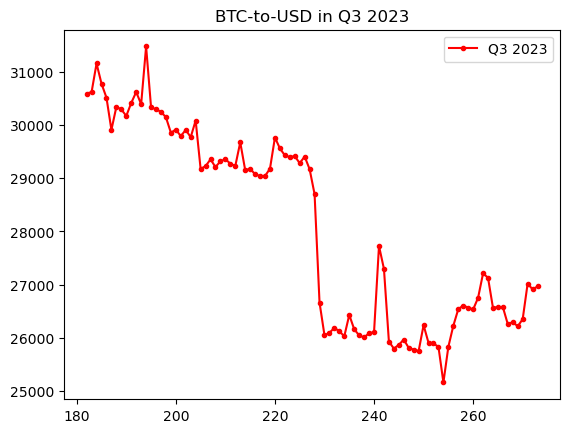

In [133]:
# Draw the fluctuation 
# Convert the 'date' column to datetime format
import matplotlib.pyplot as plt

# Plot Q3 2023 data
days = np.arange(182, 274)
plt.plot(days, q3_data, color='red', linestyle='-', marker='o', markersize=3, label='Q3 2023')

# Add title and labels
plt.title('BTC-to-USD in Q3 2023')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [134]:
# Find the day numbers with the lowest and highest observed prices
lowest_price_day = np.argmin(q3_data) + 182
highest_price_day = np.argmax(q3_data) + 182

# Convert day numbers to dates
lowest_price_date = np.datetime_as_string(np.datetime64('2023-01-01') + np.timedelta64(lowest_price_day - 1, 'D'), unit='D')
highest_price_date = np.datetime_as_string(np.datetime64('2023-01-01') + np.timedelta64(highest_price_day - 1, 'D'), unit='D')

# Print the results
print(f'Results:')
print(f"Lowest price was on day {lowest_price_date} ({q3_data[np.argmin(q3_data)]:.2f})")
print(f"Highest price was on day {highest_price_date} ({q3_data[np.argmax(q3_data)]:.2f})")

Results:
Lowest price was on day 2023-09-11 (25162.65)
Highest price was on day 2023-07-13 (31476.05)


From the above chart, we can see that bitcoin in July after a significant increase in the middle of the month, and in July 11 to reach the highest point of 31476.05 usds, after that has been in a downward trend, and in August there is a significant decline, and in September to reach the lowest level of 25,162.65 usds, and after that although there are increases, but did not exceed 28,000 usds.

### Analysis on Data Distribution 
The boxplot is primarily used to visualize and analyze the distribution, dispersion, 
and outliers of data. In order to get a clearer view of the distribution, median, outliers, 
and other statistical information of the Q3 bitcoin price rise and fall, 
so as to identify potential trends and anomalies, 
we used boxplot to plot a horizontal boxplot of the daily bitcoin price rise and fall during Q3 2023. 
We used boxplot to plot the horizontal boxplot of daily bitcoin price increases and decreases during Q3 2023 as follows：

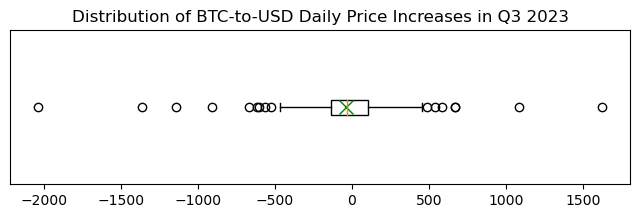

In [117]:
# Calculate daily price increases/decreases
plt.subplots(figsize=(8, 2))
price_diff = np.diff(q3_data)

# Create a horizontal box-and-whisker plot
plt.boxplot(price_diff, vert=False, widths=0.1, patch_artist=True,boxprops=dict(facecolor="none"))
plt.title("Distribution of BTC-to-USD Daily Price Increases in Q3 2023")
plt.yticks([])  # Hide y-axis ticks

# Mark the arithmetic mean with a green "x"
mean_price_diff = np.mean(price_diff)
plt.plot(mean_price_diff, 1, 'gx', markersize=10, label="Arithmetic Mean")

# Show the plot
plt.show()


In [131]:
# Calculate daily price increases/decreases
price_diff = np.diff(q3_data)

# Calculate the first and third quartiles
Q1 = np.percentile(price_diff, 25)
Q3 = np.percentile(price_diff, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify outliers using vectorized relational operators
outliers = (price_diff < lower_whisker) | (price_diff > upper_whisker)

# Count the number of outliers
num_outliers = np.sum(outliers)

# Print the result
print(f'Results:')
print(f"There are {num_outliers} outliers.")

Results:
There are 16 outliers.


From the chart above, we can visualize that Bitcoin value in Q3 (92 days in total) was generally within a range of 500 usds above and below 28,091.33 usds, i.e., 27,591 usds-28,591 usds, with another 16 days (17.78% of the total number of days) having large deviations in the price and 6 days at abnormally high levels and 10 days at abnormally low levels.
Based on the overall data situation in Q3, it is predicted that in Q4, the Bitcoin price will be stable overall or have slight oscillations.

### Conclusion

In conclusion, this report utilized the numpy toolkit to analyze the fluctuations in Bitcoin value during Q3 2023, leveraging Yahoo Finance data. By examining key statistical measures such as mean, maximum, minimum, quartiles, and outliers, we gained insights into the overall trends. The observed fluctuations in Bitcoin value during July, reaching a peak on July 11, followed by a decline in August and hitting a low in September, were evident.The horizontal boxplot provided a comprehensive visualization of daily price changes, highlighting the central tendency, dispersion, and presence of outliers. 

Based on the Q3 data, the analysis suggests that Bitcoin prices in Q4 are likely to remain relatively stable, with minor oscillations. This exploration provides valuable insights for understanding the dynamics of Bitcoin value, aiding in predictions and decision-making for stakeholders in the cryptocurrency market.

### Reference
https://finance.yahoo.com/quote/BTC-USD